## Applying K-Mean Clustering to AGT Greenhouse Data

### Background Informaiton

<small>Prior to the collection of this data, the system which is used to gather it was only tested indoors. Therefore most of the visualizations were very static. Conducting an analysis of light over time and visualizing the data would resemble a high-top like waveform graph (Figure 1-1). However, the data analyzed in this paper is straight from the outdoor lab. Therefore it is much smoother and we can obtain accurate readings of outdoor light, which may show us more exciting results when performing K-means clustering. That is not to say what was collected from the indoor readings from Figure 1-1 aren’t useful. In fact, they could be helpful in understanding how the subjects (the plants) may react to each data point measuring health, once there is a way to measure their health instead of just the environment around them.</small>

### Data Understanding

<small>The goal with this analysis is to understand which data points from Temperature, Moisture, Light and Conductivity have similar variance. Essentially, we will be using K-Means clustering to look at which features are similar to another and which are not. This information will be helpful once obtaining measurable health data from the subject is possible. Comparing the subject’s environment data to its’ heath data with a system to automatically collect it will allow us to draw conclusions much faster than manually gathering it. Since at the moment we only have environment data, we will make use of the many benefits it offers, such as planning for energy needs, water management, and extreme weather events. (NOAA Climate.Gov, 2024)</small>

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


file_path = 'AGT_REPORT_20240924_111544.xlsx'
data = pd.read_excel(file_path)

In [3]:
# View the first few rows of data to understand its structure
print(data.head())

              TIMECODE  Temperature  Moisture  Light  Conductivity  \
0  2023-06-30 20:00:45         23.8         7     74             0   
1  2023-06-30 20:11:19         23.8         7      0             0   
2  2023-06-30 20:21:52         23.7         7    115             0   
3  2023-06-30 20:32:26         23.7         7     19             0   
4  2023-06-30 20:42:59         23.8         7    115             0   

   Δ Temperature  Δ Moisture  Δ Light  Δ Conductivity  
0            NaN         NaN      NaN             NaN  
1            0.0         0.0    -74.0             0.0  
2           -0.1         0.0    115.0             0.0  
3            0.0         0.0    -96.0             0.0  
4            0.1         0.0     96.0             0.0  


In [4]:
# Select relevant numeric columns for clustering
X = StandardScaler().fit_transform(data[['Temperature', 'Moisture', 'Light', 'Conductivity']])
X = data[['Temperature', 'Moisture', 'Light', 'Conductivity']]  # Replace with your actual columns
X = X.dropna()  # Or fill missing values using X.fillna(value)


In [5]:

# Define the number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters (n_clusters) as needed

# Fit the model
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the labels back to the original DataFrame
data['Cluster'] = labels


c:\Users\jsbar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Exporatory Analysis

<small>We should first explore the greenhouse data before applying K-Means clustering. Creating a pair-plot can help with this by showing us correlations between different features. </small>

<small>A quick peek at the Conductivity value in the report data tells that it may not be too correlated with the other features. For this reason we will pass on using it in our clustering analysis. This leaves only Temperature, Light and Moisture which have mixed correlation results.</small>

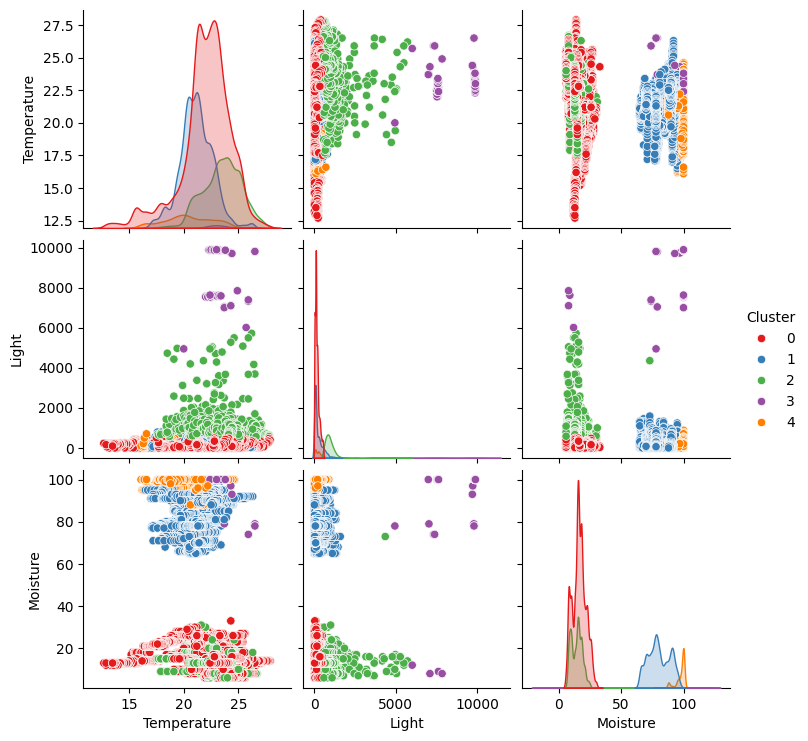

In [6]:
# Create a pairplot with 'Cluster' as the hue to distinguish clusters
sns.pairplot(data[['Temperature', 'Light', 'Moisture', 'Cluster']], hue='Cluster', palette='Set1')

# Display the plot
plt.show()

<small>Temperature and Light show a mild positive relationship where Light increases higher with Temperature. This is likely common knowledge, but it is nice to confirm on paper the type of numbers we will be working with. These are the best and only correlated features according to the collected data because the sensors used to transmit the data were in a more shady side of the greenhouse.</small>

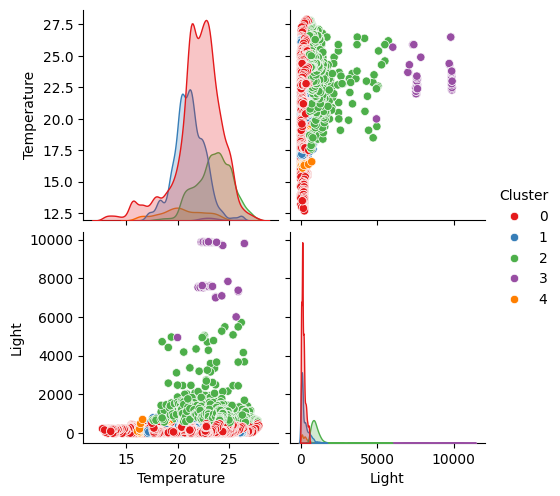

In [7]:
# Create a pairplot with 'Cluster' as the hue to distinguish clusters
sns.pairplot(data[['Temperature', 'Light', 'Cluster']], hue='Cluster', palette='Set1')

# Display the plot
plt.show()  

<small>Another pair we can take a look at is Temperature and Moisture, which do not show a clear correlation, but for reasons mentioned before regarding the shade. Since we now know that Temperature increases with Light, we can make some assumptions about how Moisture would be affected if there were more higher Light data points.</small>

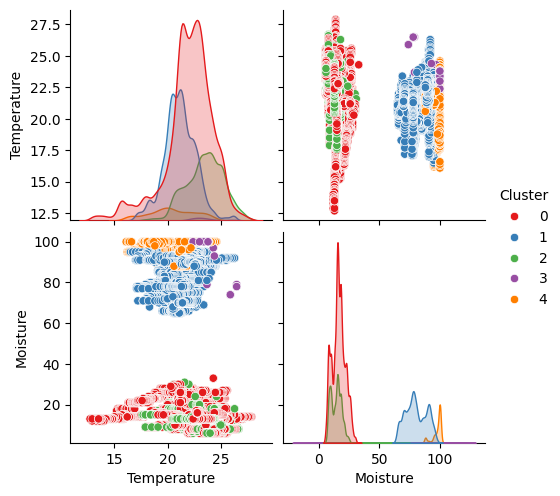

In [8]:
# Create a pairplot with 'Cluster' as the hue to distinguish clusters
sns.pairplot(data[['Temperature', 'Moisture', 'Cluster']], hue='Cluster', palette='Set1')

# Display the plot
plt.show()  

### Applying K-Means

<small>Now that we’ve completed the exploratory portion of our analysis, it is time to apply the K-Means clustering to the data so we can understand which features exhibit similar patterns or trends. Based on the earlier visualizations, it is evident that there is a mild positive correlation between Temperature and Light, which makes sense in the context of outdoor environments, where sunlight drives both heat and light levels. This similarity between Temperature and Light results in these two features being grouped together in the same cluster, reflecting their natural relationship.</small>

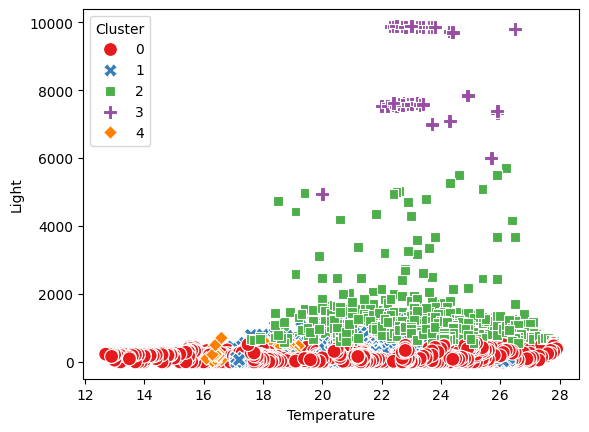

In [9]:
# Create a scatter plot for Temperature vs. Light with Cluster as the hue, using a different marker for each cluster
sns.scatterplot(data=data, x='Temperature', y='Light', hue='Cluster', palette='Set1', style='Cluster', s=100)

# Display the plot
plt.show()


### Conclusion

<small>We can now confidently say that applying the K-Means clustering to Light and Temperature data shows a pattern in regard to low light conditions (which is likely after dawn, or before dusk) and that there is less similarity in higher Light conditions. To answer our question of  “which features are similar to another and which are not”, we can conclude that Moisture and Temperature, or Moisture and Light do not have a strong natural relationship according to this data. It should be reiterated that typically Moisture would typically show a pattern with Light, but the conditions of the collection medium was not in an optimal space to return these kind of results. However, we have confirmed that Temperature and Light do display strong similarities, shown in Figure 5. This can be useful in monitoring climate cycles and identifying specific conditions. Additionally, combined with valid data about the subjects health, we can explore how different conditions affect it.</small>